### Suport Vektor Machine  mit Sklearn


von Eric Hirsch und Jonas Morsch 

### Einbinden alle benötigten Bibliotehken 

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

import Data_preparation as DP

DP=DP.Data_preparation()


from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

### Einlesen des Datensatzes 

In [1]:
df=DP.load_csv_to_df("ricsData_big_v5.csv")
print(df.columns)# Anzeigen aller features und Labels 
# Merkamle welche für die Klassifizierung benutzt werden sollen auswählen 
#df=df[["Rel_BreitGross","RelSpitze_oben","RelSpitze_unten","Anzahl_Linie","Label"]]
X_train,X_test,y_train,y_test=DP.split_data(df,0.7)# Aufteilen der Daten in Trainings und Testdaten 
df.head()

NameError: name 'DP' is not defined

### Erstellen des Suport Vector Machine Modesl und trainiern des Models

In [52]:
model=SVC()
model.fit(X_train.values,y_train.values.ravel())

SVC()

In [53]:
pred=model.predict(X_test.values)

              precision    recall  f1-score   support

           0       0.55      0.33      0.42        81
           1       0.57      0.67      0.62        78
           2       0.60      0.74      0.67        82

    accuracy                           0.58       241
   macro avg       0.58      0.58      0.57       241
weighted avg       0.58      0.58      0.57       241

Confusion matrix
[[27 30 24]
 [10 52 16]
 [12  9 61]]


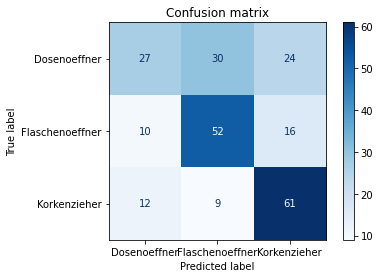

In [54]:
print(metrics.classification_report(y_test.values,pred))
np.set_printoptions(precision=2) # only to digits after the dot 
class_names=["Dosenoeffner","Flaschenoeffner","Korkenzieher"]# name the classes 

### create a confusion Matrix 
disp = ConfusionMatrixDisplay.from_estimator(
    model,
    X_test.values,
    y_test.values,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")

print("Confusion matrix")
print(disp.confusion_matrix)

In [55]:
random_index=random.randint(0,len(X_test)) # ein Index im Bereich 0 länge der Testdaten wählen 
prediction=model.predict(X_test.values[random_index].reshape(1,-1))# ein zufälligesd Bild Vorhersagen 
print("Class predictet by Naive Bayes: {}".format(prediction))
print("actual Class: {} ".format(y_test.iloc[random_index,:]))

Class predictet by Naive Bayes: [1]
actual Class: Label    2
Name: 759, dtype: int64 
